# Density Estimation Techniques
In this lab, you will implement the density estimation techniques we studied in the lecture. 

## Lab Instructions:
1. Read the explanation above each requirement very well
2. Read the requirement very well before jumping into the code.
3. Some requirements have essay questions in them, make sure you do NOT miss them.
4. PLEASE Read the hints! They are clear and made to help you complete the requirement as fast as you should

## About the Lab
This lab consists of one requirement: [Requirement 1](#Requirement-1) where you implement one of the density estimation methods.

- Refer to the slides whenever you need an equation or a formula. 
- In this lab, you are free to choose your bump function. However, higher accuracies will get a higher grade. <br/>**You will need to justify your choice of that bump function, write that in your own words, do not copy from your colleagues**
- Feel free to use code from Lab 3. 

------------------
## Density Estimation

### Recap

In the previous lab, we were introduced to the problem of classification of multivariate data, and we applied Bayes classifier to classify these points. 

The Bayes classification rule depends mainly on the class-conditional probability (also known as the class density or class distribution). An accurate method to calculate this distribution is crucial for improving the performance of the classifier. 

We built our classifier based on the assumption that this data is multivariate Gaussian random distribution, and we estimated the mean and covariance of this distribution. Finally, a test vector x is classified as (i.e. assigned) the class that maximizes the posterior probability:

$P(C_i|x_{test}) = \frac{P(x_{test}|C_i) * P(C_i)}{P(x_{test})}$

Classification of $x_{test}$ = $argmax_{i} P\big(C_i|x_{test}\big)$ = $argmax_{i} P(x|C_i) * P(C_i)$

* $P(C_i|x_{test})$: Posterior probability
* $P(x|C_i)$: Class-conditional probability (or distribution)
* $P(C_i)$: Class apriori probability
                
**Note that** $P(C_i|x_{test}) \neq P(x_{test}|C_i) * P(C_i)$. Instead,  $P(C_i|x_{test}) = \frac{P(x_{test}|C_i) * P(C_i)}{P(x_{test})}$. However, when we compare multiple classes, the denominator $P(x_{test})$ is independent of the class $i$ and can be regarded as normalizing factor.


Where $P(x|C_i)$ is given by the multivariate Gaussian random distribution:

$P(x|C_i) = \mathcal{N}(x; \mu_i, \Sigma_i) = \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_i|^{\frac{1}{2}}} exp\big(\frac{-1}{2}(x-\mu_i)^T\Sigma^{-1}_{i}(x-\mu_i)\big)$


 ### In this lab
We will drop off the assumption that $P(x|C_i)$ is drawn out of a Gaussian distribution with mean $\mu$ and covariance $\Sigma$. The distribution is not necessarily Gaussian, yet we will still apply Bayes classifier to classify between data points by assigning each point to the class that maximizes its posterior probability as usual.

#### What will change in Bayes classifier under the new assumption?
We will answer that for you! $P(x|C_i)$ is no longer equal to the Gaussian distribution as shown
in the previous equation i.e. we can’t use the Gaussian formula to substitute for $P(x|C_i)$.

#### How will we figure out the unknown distribution (also known as likelihood function)?
We will answer that for you too! There are three ways for doing so:

    1. Histogram Analysis.
       1. In this method we divide the data into certain number of bins, each bin has certain width, so we categorize the data into these bins.
       2. we do this to be able to evaluate the area under the curve using area of rectangles, instead of using complex integerations.
       3. then we sum up all the values to be able to generate a density distribution.
<br/>

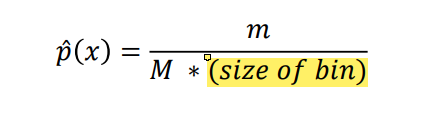
<br/>

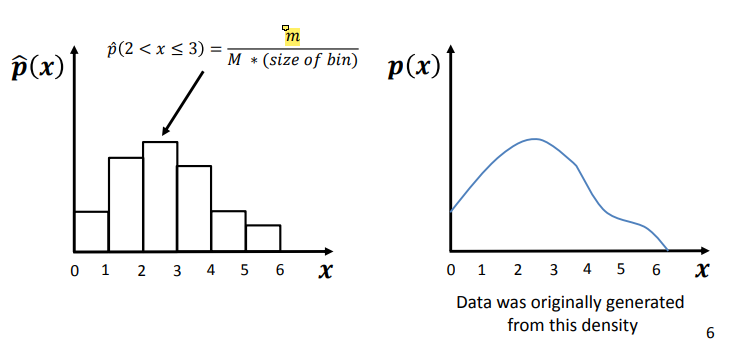 <br/>

    2. Naïve Estimator. 
       1. this approach is similar to the histogram approach, but instead of doing the windowing over all points, we just apply it on the range (h) of the data.
<br/>

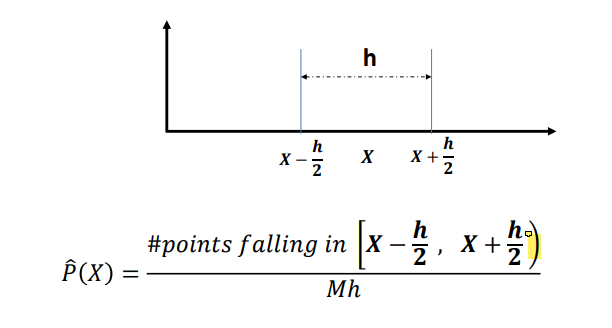

    3. Parzen Window Density Estimator (aka kernel density function)
       1. this is the best approach from the three. 
       2. this is because both of the previous approaches cause a discontinous density function, which is not good for classification.
       3. while this method produces a smooth continous density function. 
       4. this happens by applying certain function( usually we call it bump function ) on the data points, and then summing up all the values to be able to generate a density distribution.
       5. this depends on the bump function that we choose, and the window size (h) that we choose.
       6. usually to get the best results we use gaussian bump function. 
       7. the properties of the bump function are: 
           1. it is symmetric (to avoid biasing).
           2. it is continuous.
           3. it is non-negative.
           4. it is zero outside the window.
           5. it is normalized (sum up to 1).
        8. we have some limitations on h.
           1. it should not be too small to avoid bumpy density function.
           2. also it should not be too large to avoid a smooth density function, in which we will lose a lot of important information.
<br/> 

    
All these techniques aim to estimate a density function $P(x|C_i)$ for the training points, and hence you can use the density function to apply Bayes classifier and classify your test points.
*Refer to the slides to get a brief about these techniques.*


## Requirement 1

You are given files **data.csv**, **test_data.csv**, and  **test_data_true.csv**. 

**The first file** contains a list of one-dimensional data points and their corresponding classes. The data points were drawn of the
 distribution shown in Figure 1 (NOTE: It will be your task to estimate this distribution).
 
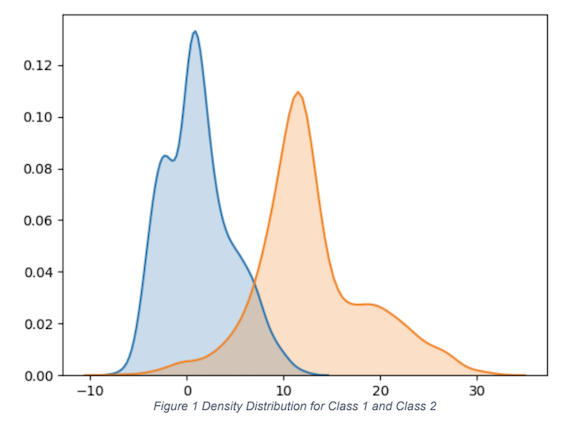

As shown in Figure 1, the points belonging to class 1 were drawn out of the distribution in blue,
whereas the points belonging to class 2 were drawn out of the distribution in red.

After applying Parzen Window Density Estimator and plotting the estimated distribution for
both classes, you should observe a similar distribution for each class to the corresponding
distribution shown in Figure 1.

The format of data files is shown in the following table:

||Class|Value|
|-|-|-|
|Point#1| 1| 5.34|
|Point#2| 2| 2.73|
|Point#3| 2| -1.832|

**The second file** contains test points without the associated classes. 

The true values for test
points are found in *test_data_true.csv*.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

**The first step** is to read and import the training data, test data and the true values for the test data,
found in the given files respectively.

In [18]:
def read_data(filePath):
    # reading the data using pandas
    data = pd.read_csv(filePath, sep=',')
    # converting it into numpy array 
    data = np.asarray(data)
    # TODO 1: Read the file 'data.csv' into the variable data.
    #        Convert the matrix data into numpy array and make sure that the values in data is float and not strings.
    # Hint: You already implemented it in Lab 3.
    # Hint: use data = np.asarray(data)
    # Note: data contains both the training data together with labelled classes.
    return data

In [19]:
def read_test_data(testFilePath, trueFilePath):
    test_data = pd.read_csv(testFilePath, sep=',')
    test_data_true = pd.read_csv(trueFilePath, sep=',')
    test_data = np.asarray(test_data)
    test_data_true = np.asarray(test_data_true)
    # TODO 2: Read the file 'test_data.csv' and 'test_data_true.csv' into the variables test_data and test_data_true.
    #         Convert the matrix data into numpy arrays and make sure that the values in data is float and not strings.
    # Hint: You already implemented it in Lab 3.
    # Note: test_data contains the unlabelled test class.
    # Note: test_data_true contains the actual classes of the test instances, which you will compare
    #       against your predicted classes.
    return test_data, test_data_true

In [20]:
data = read_data('data.csv')
test_data, test_data_true = read_test_data('test_data.csv','test_data_true.csv')

**The second step** is to choose a suitable bump function (Parzen window), and find the optimal value of `h`
for the bump function for each class.

First, fill in the function `calculate_h_optimal()`. Pass the convenient parameters.
<br/>

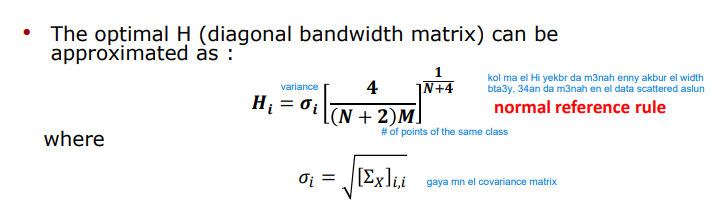

In [21]:
# Note: Pass the suitable parameters
#                                     N                  M
def calculate_h_optimal(variance, numberOfDiminsions, numberOfPoints):
    # this is the right part
    subres1 = np.multiply(4, (1/np.multiply((numberOfDiminsions+2), numberOfPoints)))
    subres = np.power(subres1, (1 / (numberOfDiminsions+4)))
    h = np.multiply(variance, subres)
    # TODO 3: Calculate the optimal value for the bandwidth (h) of Parzen window (or the bump function you are going
    #  to compute). Pass the suitable parameters. 
    # Hint: Refer to the slides to find out the equation of computing h optimal and know which parameters you should pass.
    return h
# make sure it is working correctly
# this is the method we use to avoid floating errors. (subtract and check that the result is less than small decimal points)
assert (calculate_h_optimal(2, 4,2)- 1.743371) < 1e-2, "Not correct"


Second, implement the bump function (i.e. Parzen window). You should compute
the bump function for any x, given a point p and an optimal value for h.

Y = F(x), where x represents the domain of the function or equivalently some
values to compute the bump function at, y represents the output of the bump
function and F represents the bump function.

**Notes:** You should vectorise this (i.e. your function should work if x were a single data point or a vector of M data points).

<br/>

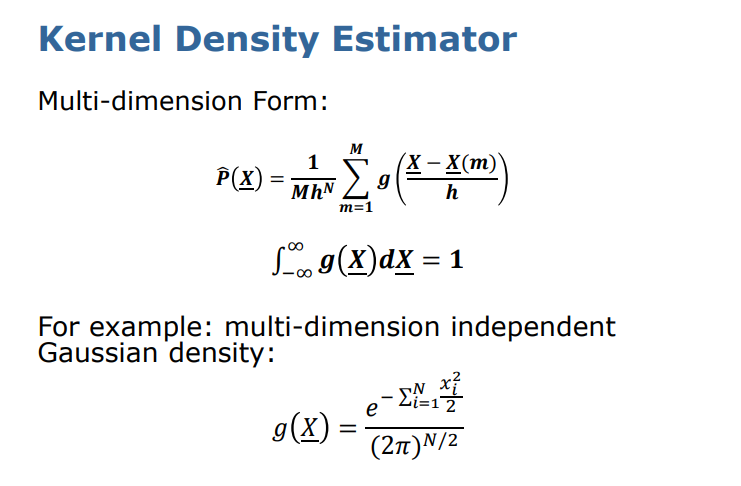


## Gausian function

In [22]:
# TODO 6: Implement the multivariate normal gaussian distribution with parameters mu and sigma, and return the
#  value in prob.
def multivariate_normal_gaussian(X, mu, sigma):
    prob = (1/ ((2 * np.pi)**(len(X)/2) * np.linalg.det(sigma)**(1/2))) * np.exp(-1/2 * (X-mu).T @ np.linalg.inv(sigma) @ (X-mu)) # @ is the matrix multiplication
    return prob

In [23]:
def bump_function(point, x, h):
    # this should be gaussian function
    f = (1/(np.sqrt(2*np.pi))) * np.exp(-1/2 * ((x-point)/h)**2) # 1D gaussian
    # f = multivariate_normal_gaussian(point, x, np.identity(len(x))*h**2) # multivariate gaussian
    
    # TODO 4: Implement the bump function phi(x) at point p with bandwidth h. Note that x can be a scalar or a vector.
    # NOTE: Your solution should be vectorized.
    f = np.asarray(f)
    return f

**Question 1** What are the criteria of choosing bump function?

### Criteria of choosing a bump function
* I belive that the criteria of choosing a bump function should follow logical steps. 
  1. The bump function should be symmetric, to avoid biasing.
  2. It should be continuous, to avoid discontinuities.
  3. It should be able to generate a smooth denisty function, to avoid bumpy density function.
  4. also I think It should be representative of the data, to avoid losing important information.

**Question 2** Justify why you choose that as your bump function. Do you expect it to enhance accuracy? Why? 

Write everything you would like to say

### Kernel Density Estimation
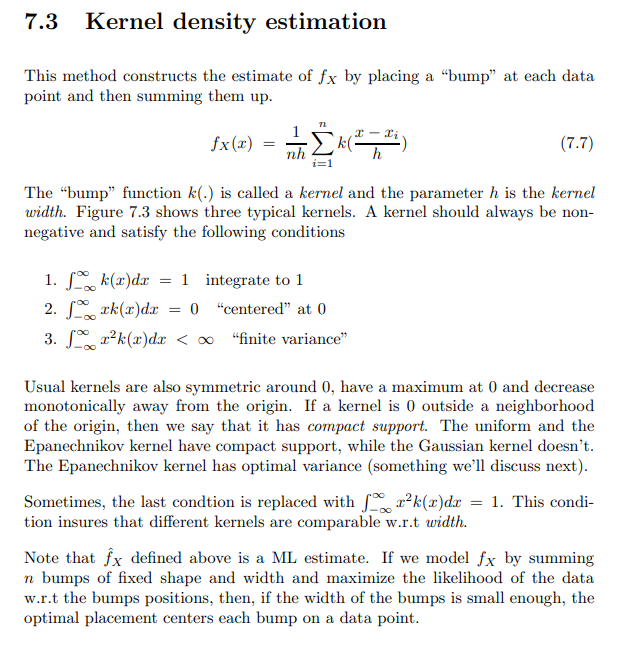

### Different shapes of the kernel any why I choose it.
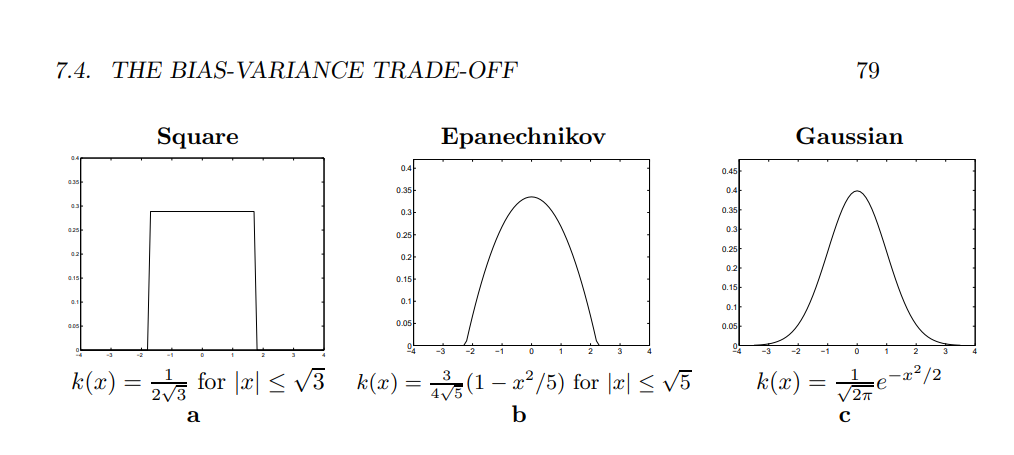

### Why I Chose gaussian function
* Actually I chose gaussian function as my bump function because 
    gaussian distribution is defined as the king of all distributions, 
    this is because: 
    1. Continous and symmetric around its center.
    2. Its mean, mode, median are all equal. 
    3. Its shape looks like shown in fig(c) above, so most of the data
    are clustered around the mean. 
    4. about 70% of the values are drawn within our first (sigma). 
    5. 95% are drawn from the 2sigma. 
    6. It represents most of the distribution in our world :)
    7. such as human age, IQ, height, etc...

> Question:
* I still wonder what is the difference between it and fig(2) for example. 

### Should it enhance accuracy?
* definitely yes, I belive that there should be no bump functions that will produce a better result than gaussian function.

**At this point,** you need to iterate over the training points and apply the bump
function for every training point.\
The density estimate will be the accumulation (i.e. the sum) of the output of these bump functions.

We first need to generate the x vector which represents the possible values for the one
dimensional feature we have. You can find the minimum and maximum possible values for x among the training data, and generate a range of points which will represent your one-dimensional axis.

                            x = np.linspace(min_x, max_x, number_of_axis_points)
                            
Here, `min_x` represents the minimum value for the feature x, `max_x` represents the
maximum value for the feature x, and `number_of_axis_points` represents the
resolution of the scale (or how many points should be included between these two
limits).

In [24]:
# TODO 5: Construct x-axis that will be used in density estimation.
min_x = np.min(data)
max_x = np.max(data)
number_of_axis_points = 10000
x = np.linspace(min_x, max_x, number_of_axis_points)
x

array([-7.02452718, -7.02072435, -7.01692152, ..., 30.99239433,
       30.99619717, 31.        ])

Now we need to compute the desnsities for each class. Remember that the density estimate represents `P(x|Ci)`

We start by computing h_optimal for each class we have:

In [25]:
# TODO 6: Calculate the optimal h for each class. 
# (Warning: Do not use for loops. Use vectorization, broadcasting and masking).
class1Data = data [data[:,0] == 1]
class2Data = data[data[:,0] == 2]
h1 = calculate_h_optimal(variance= np.std(class1Data), numberOfDiminsions=1, numberOfPoints=len(class1Data))
h2 = calculate_h_optimal(variance= np.std(class2Data), numberOfDiminsions=1, numberOfPoints=len(class2Data))



We then use these h_optimals to calculate the density functions:

In [26]:
# TODO 7: Calculate the probability density function p(x|C1) and p(x|C2) for each value on the constructed x-axis
# pxgivenC1 = np.zeros(len(x))
# pxgivenC2 = np.zeros(len(x))
# for i in range(len(x)):
#     pxgivenC1[i] = np.sum(bump_function(x= x[i],point= class1Data[:,1], h = h1), axis=0)
#     pxgivenC2[i] = np.sum(bump_function(x= x[i], point= class2Data[:,1],h =  h2), axis=0)
class1Points = class1Data[:,1]
class2Points = class2Data[:,1]

pxgivenC1 = np.sum (np.asarray([bump_function(x= x, point=  classPoint, h = h1) for classPoint in class1Points]), axis = 0)
pxgivenC2 = np.sum (np.asarray([bump_function(x= x, point=  classPoint, h = h2) for classPoint in class2Points]), axis = 0)
pxgivenC1 = np.multiply(pxgivenC1, 1/(len(class1Points) * h1))
pxgivenC2 = np.multiply(pxgivenC2, 1/(len(class1Points) * h2))

print (pxgivenC1)


[1.09692769e-003 1.10209699e-003 1.10728813e-003 ... 7.29977310e-189
 6.15356507e-189 5.18715686e-189]


Now we need to visualize how well are we estimating the densities.\
Let's plot the density estimates for the two classes that we computed in **ONE PLOT** with **DIFFERENT
COLORS.** This is an ordinary plot.

**Check your plot result**:\
Is it similar to Figure 1? If yes, proceed to question 5. If no, unfortunately you have
done something wrong. Think: Do you need another bump function? Do you need more points? 

**FAQ:** What do you mean by two classes in one plot with different colors?\
Answer: The two classes are overlaid together in one plot (such as Figure 1) with
different colors (red and blue). We can’t be any more specific :")

(10000,) (10000,) (10000,)


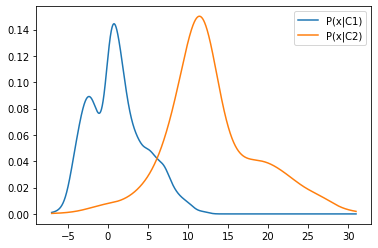

In [27]:
# plot the estimated densities
# TODO 8: Plot the two densities P(x|C1) and P(x|C2) on the same plot. use plt.plot(..)/
print(x.shape , pxgivenC1.shape, pxgivenC2.shape)
plt.plot(x, pxgivenC1, label='P(x|C1)')
plt.plot(x, pxgivenC2, label='P(x|C2)')
plt.legend()
plt.show()



It’s time to classify the test points. You know what to do already! Given the points in
the test file, it’s required to classify each point whether it belongs to class 1 or 2 by
applying Bayes classifier. Report the accuracy of your classifier by comparing with
the true values found in the third file.

Hint: It’s not as easy as it looks like, there’s a trick here. Be creative in your solution.
Solutions may differ in this part, and this may lead to varying accuracies between
students.\
*May the odds be in your favor and you get the highest accuracy!*

In [28]:
# TODO 9: Calculate the aprior probabilities p(C1) and p(C2).
pc1 = len(class1Data)/len(data) 
pc2 = len(class2Data)/len(data)



In [29]:
# TODO 10: Calculate the posterior probabilities p(C1|x) and p(C2|x) for all values in x.
pc1GivenX = pxgivenC1 * pc1
pc2GivenX = pxgivenC2 * pc2

In [30]:
def find_nearest(array, value):
    '''
    This function finds which element in array is equal to value. If not found, it returns the nearest (or closest)
    element in the array to value.
    :param array: An array of values to search in.
    :param value: A value to select from the array.
    :return: The index of the found element in the array. If not found, it returns the index of the closest element.
    '''
    ## DO NOT Change Code ##
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return index

In [31]:
# TODO 11: Compute the accuracy of your classifier.
accuracy = 0
for idx, point in enumerate(test_data):
    classification =  1 if pc1GivenX[find_nearest(x, point)] > pc2GivenX[find_nearest(x, point)] else 2
    print("for point:", point, "the classification: ", classification)
    if classification == test_data_true[idx]:
        accuracy += 1
accuracy = accuracy / len(test_data)
accuracy *= 100


for point: [11.23317053] the classification:  2
for point: [17.05956066] the classification:  2
for point: [20.] the classification:  2
for point: [-3.1319357] the classification:  1
for point: [8.80189039] the classification:  2
for point: [6.] the classification:  2
for point: [0.14068925] the classification:  1
for point: [3.00817328] the classification:  1
for point: [5.] the classification:  1
for point: [1.45768636] the classification:  1
for point: [23.] the classification:  2
for point: [2.47872809] the classification:  1
for point: [-2.89862058] the classification:  1
for point: [2.88643351] the classification:  1
for point: [10.98552329] the classification:  2
for point: [10.50195166] the classification:  2
for point: [21.09271188] the classification:  2
for point: [0.75791643] the classification:  1
for point: [-4.01268405] the classification:  1
for point: [-2.83807276] the classification:  1
for point: [13.21236831] the classification:  2
for point: [18.] the classificatio

In [32]:
print("Accuracy = ", accuracy, "%")

Accuracy =  90.0 %
